In [29]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [30]:
look_back = 15

In [31]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
type(df)

pandas.core.frame.DataFrame

In [42]:

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]
df["value"].values


array([3., 1., 3., ..., 2., 4., 2.])

In [35]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

test_generator.data

array([[2.],
       [2.],
       [3.],
       ...,
       [2.],
       [4.],
       [2.]])

In [43]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)


model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

ValueError: Input 0 of layer lstm_11 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 10]

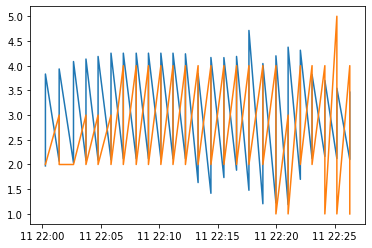

In [41]:
prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:50], prediction[:50])
plt.plot(date_test[:50], parking_test[:50])
plt.show()